In [6]:
import sqlite3

# Function to initialize the database and insert users
def init_db_with_users(user_list):
    # Connect to SQLite database (or create it if it doesn't exist)
    conn = sqlite3.connect('users.db')
    c = conn.cursor()
    
    # Create table if it does not exist
    c.execute('''
        CREATE TABLE IF NOT EXISTS users (
            id INTEGER PRIMARY KEY,
            username TEXT NOT NULL,
            password TEXT NOT NULL
        )
    ''')
    
    # Delete all existing users
    c.execute("DELETE FROM users")
    
    # Insert users into the table
    for user in user_list:
        c.execute("INSERT INTO users (username, password) VALUES (?, ?)", (user['username'], user['password']))
    
    # Save (commit) the changes and close the connection
    conn.commit()
    conn.close()

# List of users to be added
users_to_add = [
    {'username': 'Lele', 'password': 'lele_123'},
    {'username': 'Augi', 'password': 'augi_123'},
    {'username': 'Consi', 'password': 'consi_123'},
    {'username': 'Mama', 'password': 'mama_123'},
    {'username': 'Papa', 'password': 'papa_123'},
    {'username': 'Oma', 'password': 'oma_123'},
    {'username': 'Jutta', 'password': 'jutta_123'},
    {'username': 'Peter', 'password': 'peter_123'},
    {'username': 'admin', 'password': 'admin_123'},

]

# Initialize the database and insert users
init_db_with_users(users_to_add)


In [7]:

# Function to read data from the database
def read_db():
    # Connect to SQLite database
    conn = sqlite3.connect('users.db')
    c = conn.cursor()
    
    # Query to select all data from users table
    c.execute("SELECT * FROM users")
    
    # Fetch all rows from the query result
    rows = c.fetchall()
    
    # Close the connection
    conn.close()
    
    # Return the fetched data
    return rows

# Reading the data from the database
user_data = read_db()

# Printing the user data
for user in user_data:
    print(user)

(1, 'Lele', 'lele_123')
(2, 'Augi', 'augi_123')
(3, 'Consi', 'consi_123')
(4, 'Mama', 'mama_123')
(5, 'Papa', 'papa_123')
(6, 'Oma', 'oma_123')
(7, 'Jutta', 'jutta_123')
(8, 'Peter', 'peter_123')
(9, 'admin', 'admin_123')


In [178]:
import pandas as pd

df = pd.read_csv("/Users/merbecksconstantin/Downloads/2024-06-14T16-35_export.csv")

df["Username"] = df["Username"].replace("Lia", "Lia & Klaus")
overall_votes = ['champion', 'vice_champion', 'third_place', 'fourth_place']

df_overall = df[df["Vote ID"].isin(overall_votes)].copy()


In [179]:
df = df[~df["Vote ID"].isin(overall_votes)]

df.loc[~df["Vote ID"].isin(overall_votes), "Group"] = df.loc[~df["Vote ID"].isin(overall_votes), "Vote ID"].apply(lambda x: x.split("_")[0])
df.loc[~df["Vote ID"].isin(overall_votes), "Place"] = df.loc[~df["Vote ID"].isin(overall_votes), "Vote ID"].apply(lambda x: x.split("_")[1])

df["Place"] = df["Place"].map({"1st": "1. Platz", "2nd": "2. Platz"})

In [180]:
# df = df[df["Vote ID"]]
df = df[["Username", "Group", "Place", "Vote Value"]].rename(columns={"Username": "Name", "Vote Value": "Tipp", "Group": "Gruppe", "Place": "Platz"})
df.head(19)

,Name,Gruppe,Platz,Tipp
0,Papa,A,1. Platz,Germany
1,Papa,A,2. Platz,Switzerland
2,Papa,B,1. Platz,Albania
3,Papa,B,2. Platz,Spain
4,Papa,C,1. Platz,Serbia
5,Papa,C,2. Platz,Slovenia
6,Papa,D,1. Platz,Poland
7,Papa,D,2. Platz,Austria
8,Papa,E,1. Platz,Romania
9,Papa,E,2. Platz,Belgium


In [181]:
country_to_emoji = {
    "Germany": "🇩🇪",
    "Scotland": "🏴󠁧󠁢󠁳󠁣󠁴󠁿",
    "Hungary": "🇭🇺",
    "Switzerland": "🇨🇭",
    "Spain": "🇪🇸",
    "Croatia": "🇭🇷",
    "Italy": "🇮🇹",
    "Albania": "🇦🇱",
    "Slovenia": "🇸🇮",
    "Denmark": "🇩🇰",
    "Serbia": "🇷🇸",
    "England": "🏴󠁧󠁢󠁥󠁮󠁧󠁿",
    "Poland": "🇵🇱",
    "Netherlands": "🇳🇱",
    "Austria": "🇦🇹",
    "France": "🇫🇷",
    "Belgium": "🇧🇪",
    "Slovakia": "🇸🇰",
    "Romania": "🇷🇴",
    "Ukraine": "🇺🇦",
    "Turkey": "🇹🇷",
    "Georgia": "🇬🇪",
    "Portugal": "🇵🇹",
    "Czech Republic": "🇨🇿"
}


df["Emoji"] = df["Tipp"].map(country_to_emoji)

In [182]:

overall_votes_dict = {'champion': "Europameister", 'vice_champion': "2. Platz", 'third_place': "3.Platz", 'fourth_place': "4. Platz"}


df_overall = df_overall.rename(columns={"Username": "Name", "Vote Value": "Tipp", "Group": "Gruppe", "Place": "Platz", "Vote ID": "Platzierung"})

df_overall["Platzierung"] = df_overall["Platzierung"].map(overall_votes_dict)



In [183]:
df_overall = df_overall[["Name", "Platzierung", "Tipp"]]

In [184]:
df_overall["Emoji"] = df_overall["Tipp"].map(country_to_emoji)

In [185]:
df["Tip"] = df["Tipp"] + "(" + df["Emoji"] + ")"

In [186]:
df.pivot(index=['Gruppe', 'Platz'], columns='Name', values=['Emoji']).to_parquet("group_votes.parquet")

In [187]:
groups = pd.read_parquet("group_votes.parquet")
groups["Punkte"] = 2

In [188]:
groups

Emoji                                                       \
Name                Augi    Consi     Lele Lia & Klaus     Mama      Oma Papa   
Gruppe Platz                                                                    
A      1. Platz       🇩🇪       🇩🇪       🇩🇪          🇩🇪       🇩🇪       🇩🇪   🇩🇪   
       2. Platz       🇨🇭       🇨🇭  🏴󠁧󠁢󠁳󠁣󠁴󠁿          🇭🇺       🇨🇭       🇭🇺   🇨🇭   
B      1. Platz       🇪🇸       🇪🇸       🇮🇹          🇪🇸       🇪🇸       🇮🇹   🇦🇱   
       2. Platz       🇭🇷       🇮🇹       🇪🇸          🇭🇷       🇮🇹       🇪🇸   🇪🇸   
C      1. Platz  🏴󠁧󠁢󠁥󠁮󠁧󠁿       🇷🇸  🏴󠁧󠁢󠁥󠁮󠁧󠁿     🏴󠁧󠁢󠁥󠁮󠁧󠁿  🏴󠁧󠁢󠁥󠁮󠁧󠁿  🏴󠁧󠁢󠁥󠁮󠁧󠁿   🇷🇸   
       2. Platz       🇸🇮  🏴󠁧󠁢󠁥󠁮󠁧󠁿       🇸🇮          🇩🇰       🇩🇰       🇩🇰   🇸🇮   
D      1. Platz       🇳🇱       🇫🇷       🇫🇷          🇫🇷       🇵🇱       🇫🇷   🇵🇱   
       2. Platz       🇫🇷       🇳🇱       🇦🇹          🇳🇱       🇳🇱       🇳🇱   🇦🇹   
E      1. Platz       🇧🇪       🇧🇪       🇧🇪          🇧🇪       🇧🇪       🇸🇰   🇷🇴   
       2. Platz       🇺🇦       🇺🇦       🇺🇦          🇺🇦       🇺🇦       🇧🇪   🇧🇪   
F      1. Platz       🇵🇹       🇵🇹       🇵🇹          🇵🇹       🇵🇹       🇵🇹   🇹🇷   
       2. Platz       🇨🇿       🇨🇿       🇨🇿          🇨🇿       🇨🇿       🇹🇷   🇵🇹   

                Punkte  
Name                    
Gruppe Platz            
A      1. Platz      2  
       2. Platz      2  
B      1. Platz      2  
       2. Platz      2  
C      1. Platz      2  
       2. Platz      2  
D      1. Platz      2  
       2. Platz      2  
E      1. Platz      2  
       2. Platz      2  
F      1. Platz      2  
       2. Platz      2

In [189]:
df_overall = df_overall.pivot(index=["Platzierung"], columns='Name', values=['Emoji'])

In [190]:
desired_order = ["Europameister", "2. Platz", "3.Platz", "4. Platz"]
df_overall = df_overall.reindex(desired_order)
df_overall = df_overall.reset_index()
df_overall.columns = df_overall.columns.get_level_values(1)
df_overall["Punkte"] = [5, 3, 2, 2]
df_overall.columns = ["Tipp"] + list(df_overall.columns[1:].values)
df_overall

,Tipp,Augi,Consi,Lele,Lia & Klaus,Mama,Oma,Papa,Punkte
0,Europameister,🇪🇸,🇩🇪,🇩🇪,NaN,🇮🇹,🇩🇪,🇦🇱,5
1,2. Platz,🇩🇪,🇪🇸,🇫🇷,NaN,🇩🇪,🏴󠁧󠁢󠁥󠁮󠁧󠁿,🇩🇪,3
2,3.Platz,🇫🇷,🇨🇭,🇵🇹,NaN,🇪🇸,🇮🇹,🇺🇦,2
3,4. Platz,🇮🇹,🇫🇷,🇮🇹,NaN,🇳🇱,🇪🇸,🏴󠁧󠁢󠁳󠁣󠁴󠁿,2


In [191]:
df_overall.to_parquet("overall_votes.parquet")

In [177]:
df_overall.reindex(desired_order)

,Tipp,Augi,Consi,Lele,Lia & Klaus,Mama,Oma,Papa,Punkte
Europameister,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2. Platz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.Platz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4. Platz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


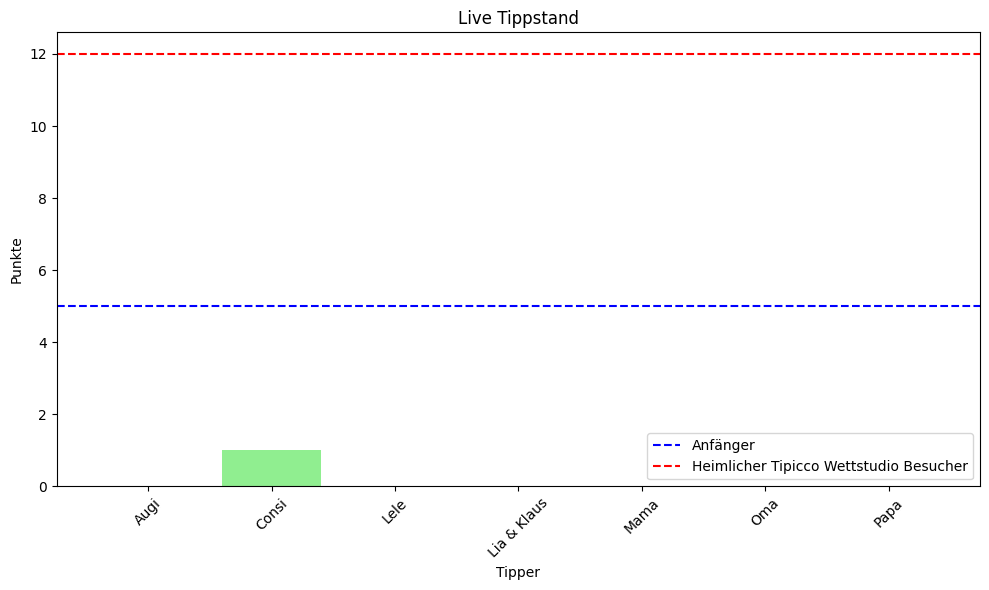

In [201]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    'Names': ['Augi', 'Consi', 'Lele', 'Lia & Klaus', 'Mama', 'Oma', 'Papa'],
    'Points': [0, 1, 0, 0, 0, 0, 0]
}

df = pd.DataFrame(data)

# Create bar chart with different colors for each bar
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink', 'lightseagreen', 'lightsteelblue']

# Create bar chart with different colors for each bar and additional horizontal lines
plt.figure(figsize=(10, 6))
plt.bar(df['Names'], df['Points'], color=colors)
plt.axhline(y=5, color='blue', linestyle='--', label='Anfänger')
plt.axhline(y=12, color='red', linestyle='--', label='Heimlicher Tipicco Wettstudio Besucher')
# plt.axhline(y=17, color='green', linestyle='--', label='Profi Tipper')

plt.xlabel('Tipper')
plt.ylabel('Punkte')
plt.title('Live Tippstand')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


